In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv("AppleStore.csv")
df = pd.DataFrame(data)
df

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1188191109,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0
11096,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1,0
11097,1188474007,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0
11098,1188482421,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0


In [25]:
y = pd.DataFrame(data["prime_genre"])
y = y.replace(np.nan,'0',regex=True)
le = LabelEncoder()
y= le.fit_transform(y)
max(y)

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23

In [26]:
df = df.replace(np.nan,'',regex=True)

In [27]:
df = df.drop("id",axis = 1)
df = df.drop("track_name",axis = 1)
df = df.drop("currency",axis = 1)
df = df.drop("ver",axis = 1)

In [28]:
for i in range(12):
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])

In [29]:
x = df.iloc[:,0:12]
x

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,3658,4,2535,26,7,8,3,8,15,5,10,1
1,5000,0,3061,26,7,6,3,16,14,5,23,1
2,3645,0,3089,968,6,8,3,23,14,5,3,1
3,4433,0,3113,553,7,8,1,18,14,5,9,1
4,3396,0,3178,1044,8,9,3,17,14,5,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11095,0,0,0,0,0,0,0,0,0,1,1,0
11096,3339,0,3,3,9,9,3,8,17,0,2,1
11097,0,0,0,0,0,0,0,0,0,1,1,0
11098,0,0,0,0,0,0,0,0,0,1,1,0


In [30]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.57698484,  1.16194996,  2.32736204, ...,  1.09173815,
         0.94394788,  0.7437064 ],
       [ 1.14508841, -0.40997503,  2.9349097 , ...,  1.09173815,
         2.93908027,  0.7437064 ],
       [ 0.5714816 , -0.40997503,  2.96725064, ...,  1.09173815,
        -0.13035418,  0.7437064 ],
       ...,
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.85364748,
        -0.43729763, -1.34461665],
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.85364748,
        -0.43729763, -1.34461665],
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.85364748,
        -0.43729763, -1.34461665]])

In [31]:
# Initializing KMeans
kmeans = KMeans(n_clusters=24)
# Fitting with inputs
kmeans = kmeans.fit(x)
C = kmeans.cluster_centers_

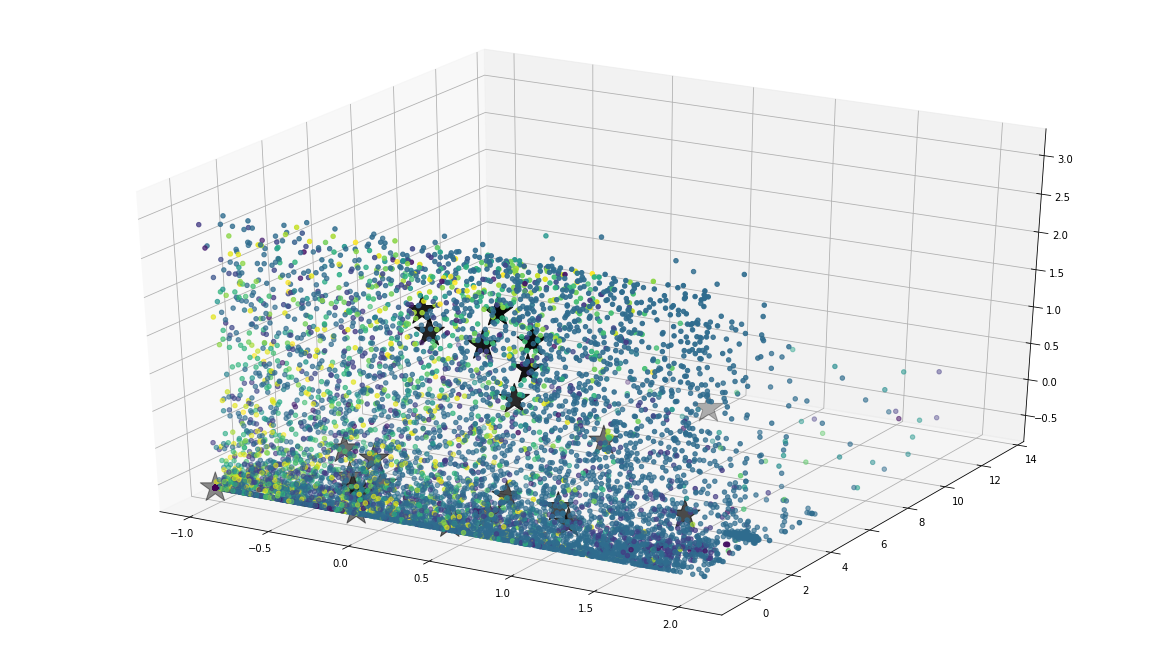

In [32]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
plt.show()